
## Training a Neural Network



## Installs:

In [ ]:
# % pip install torch
# % pip install sklearning
# % pip install torchsummary

## Imports:


In [ ]:
# Pytorch
import torch
from torch import nn # Neural Network
from torch import optim # Optimizer
from torchvision import datasets # Datasets from Pytorch
from torchvision import transforms # Transoform data in tensor
from torch.utils.data import DataLoader

# Torchsummary
from torchsummary import summary

# Sklearning
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

## Loss functions

* The cost function reduces all the good and bad aspects of a complex system to a single number, a scalar value, which allows ranking and comparing candidate solutions.

## best-known error functions:

* Loss L1 = | y' - y |

* MSE = | y' - y |²

## Check which device is available


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cpu')

## Loading Dataset

In [ ]:
# Loading wine dataset
wine = load_wine()

In [ ]:
# Data
data = wine.data

In [ ]:
# Target
target = wine.target

In [ ]:
# Data size
data.shape

(178, 13)

In [ ]:
# Target size
target.shape

(178,)

In [ ]:
# Feature names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# Target names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
# Data head
data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
# Target head
target[:5]

array([0, 0, 0, 0, 0])

## Creating a neural network for the wine dataset

In [ ]:
# Assembling network model
class WineNetwork(nn.Module):

    # Initialization function
    def __init__(self, inputsize, outsize, dropout_prob = 0.5):
        super(WineNetwork,self).__init__()

        # Defining neural network layers

        self.layers = nn.Sequential(

            # Imput Layer + Hidden Layer_0
            nn.Linear(inputsize, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),

            # Hidden Layer_1
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_prob)
        )
        # Out Layer
        self.out = nn.Sequential(
            nn.Linear(64, outsize),
            nn.Softmax(dim = -1)
        )
    # Forward function
    def forward(self, X):

        # Input Layer + Hidden Layers
        layers = self.layers(X)

        # Output Layer
        output = self.out(layers)

        # Returning the output data
        return output

In [ ]:
net_wine = WineNetwork(
    inputsize = data.shape[1],
    outsize = len(wine.target_names)
).to(device)

In [ ]:
net_wine

WineNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
  )
  (out): Sequential(
    (0): Linear(in_features=64, out_features=3, bias=True)
    (1): Softmax(dim=-1)
  )
)

## Instantiating a loss function

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)

## Transforming data into tensor

In [ ]:
# Data
X = torch.from_numpy(data).float()

In [ ]:
# Target
y = torch.from_numpy(target).long()

In [ ]:
# Co casting with the device

X = X.to(device)

y = y.to(device)

In [ ]:
# Viewing tensor types
f'X: {X.dtype} - y: {y.dtype}'

'X: torch.float32 - y: torch.int64'

## Making prediction

In [ ]:
# Starting network with values of X
pred = net_wine(X)

# Vizualizing dimensions of prediction

f'Pred size: {pred.size()} ---- Data size: {X.size()}'



'Pred size: torch.Size([178, 3]) ---- Data size: torch.Size([178, 13])'

In [ ]:
# Visualizing dimensions of prediction and prediction targets
f'Pred size: {pred.size()} ----  y Test size: {y.size()}'

'Pred size: torch.Size([178, 3]) ----  y Test size: torch.Size([178])'

In [ ]:
## Exemple
f'{pred[0]}{y[0]}'

'tensor([0., 1., 0.], grad_fn=<SelectBackward0>)0'

In [ ]:
loss =  criterion(pred, y)
loss

tensor(1.2941, grad_fn=<NllLossBackward0>)

## Pytorch Optimization

## Loading Dataset

In [ ]:
# Define the dataset features
# Selecting features 0 and 9

features = [0, 9]

In [ ]:
# Loading dataset wine
wine = load_wine()

# Data
data = wine.data[:, features]

# Target
target = wine.target

## Viewing the Dataset

Text(0, 0.5, 'color_intensity')

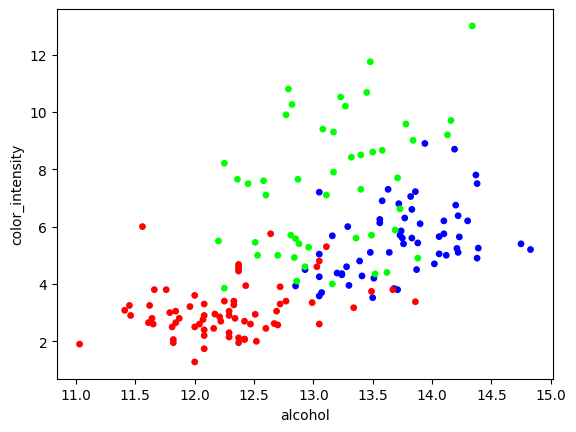

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s = 15, c = target, cmap = plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

## Data Normalization

In [ ]:
# Creating scaler object
scaler = StandardScaler()

In [ ]:
# Normalizing the data
data = scaler.fit_transform(data)

Text(0, 0.5, 'color_intensity')

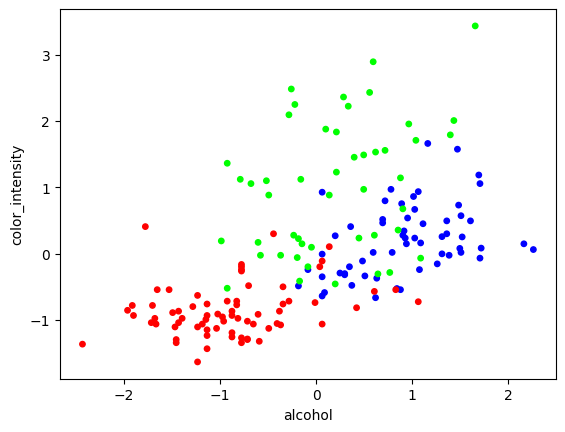

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s = 15, c = target, cmap = plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

## Creating a new neural network for the wine dataset

In [ ]:
# Assembling network model
class WineNetwork(nn.Module):

    # Initialization function
    def __init__(self, inputsize, outsize, dropout_prob = 0.5):
        super(WineNetwork,self).__init__()

        # Defining neural network layers

        self.layers = nn.Sequential(

            # Imput Layer + Hidden Layer_0
            nn.Linear(inputsize, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),

            # Hidden Layer_1
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_prob)
        )
        # Out Layer
        self.out = nn.Sequential(
            nn.Linear(64, outsize),
            nn.Softmax(dim = -1)
        )
    # Forward function
    def forward(self, X):

        # Input Layer + Hidden Layers
        layers = self.layers(X)

        # Output Layer
        output = self.out(layers)

        # Returning the output data
        return output

In [ ]:
new_net_wine = WineNetwork(
    inputsize = data.shape[1],
    outsize = len(wine.target_names)
).to(device)

In [ ]:
new_net_wine

WineNetwork(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
  )
  (out): Sequential(
    (0): Linear(in_features=64, out_features=3, bias=True)
    (1): Softmax(dim=-1)
  )
)

In [ ]:
# Transforming data into tensor
X = torch.tensor(data).float().to(device)
y = torch.tensor(target).long().to(device)

## Visualizing decision boundary

In [ ]:
def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

  spacing = min(x_max - x_min, y_max - y_min) / 100

  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

  data = np.hstack((XX.ravel().reshape(-1,1),
                    YY.ravel().reshape(-1,1)))

  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)

  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

  Z = clf.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

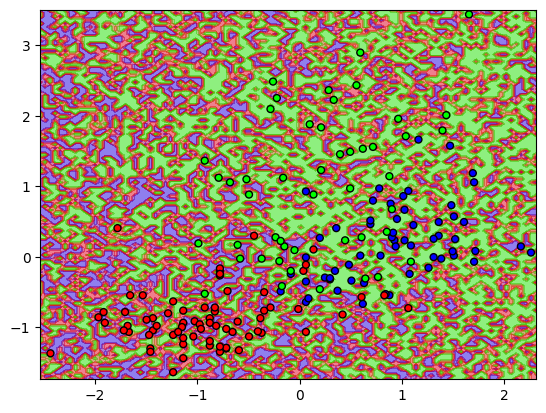

In [ ]:
plot_boundary(data, target, new_net_wine)

## Loss function

In [ ]:
# Cross Entropy
criterion = nn.CrossEntropyLoss().to(device)

## Optimizer Gradient descent

In [ ]:
optimizer = optim.Adam(new_net_wine.parameters(),  lr = 1e-3, weight_decay = 5e-4)

<ipython-input-39-dc77438a2db2>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


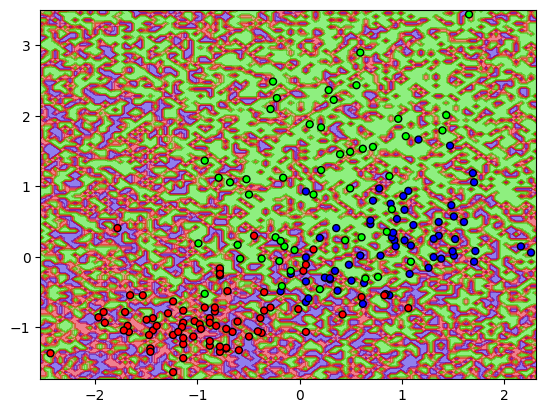

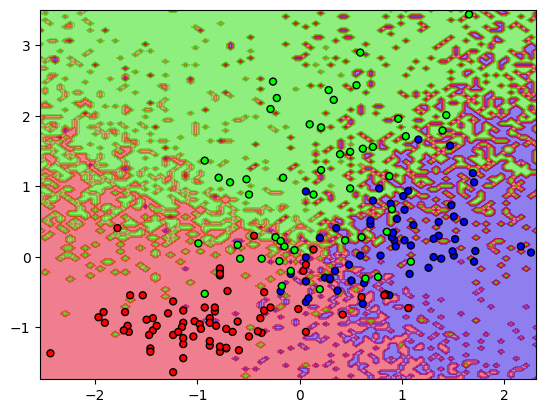

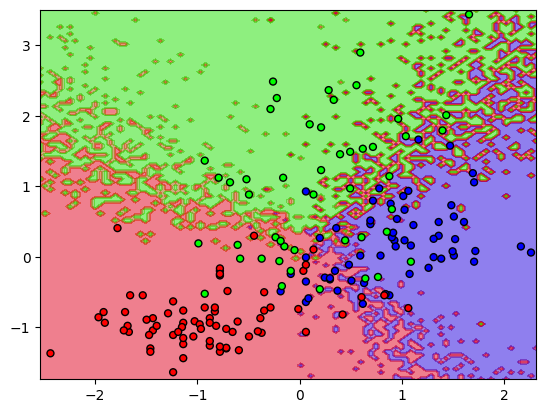

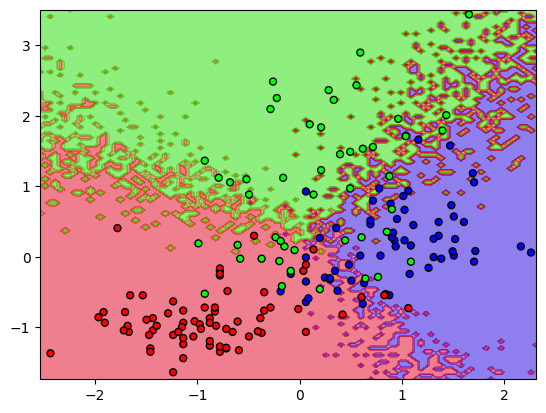

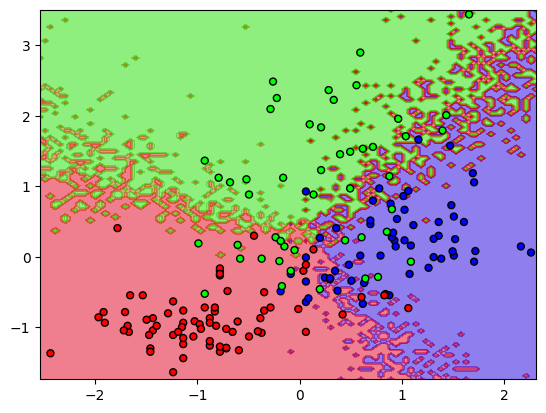

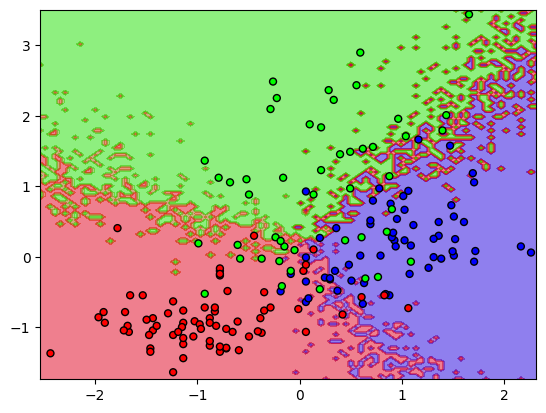

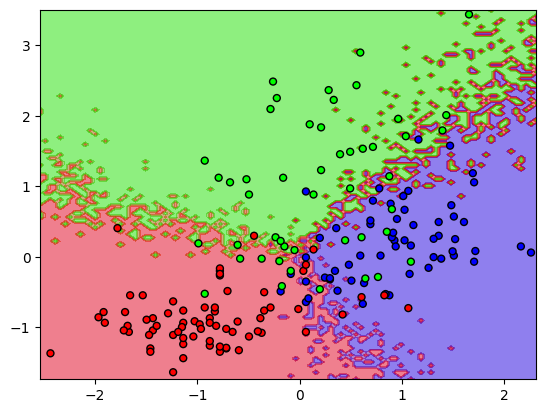

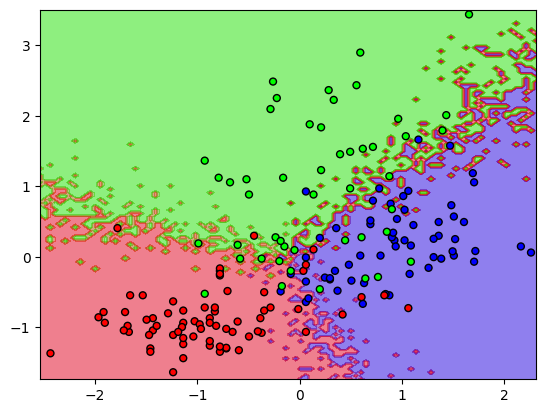

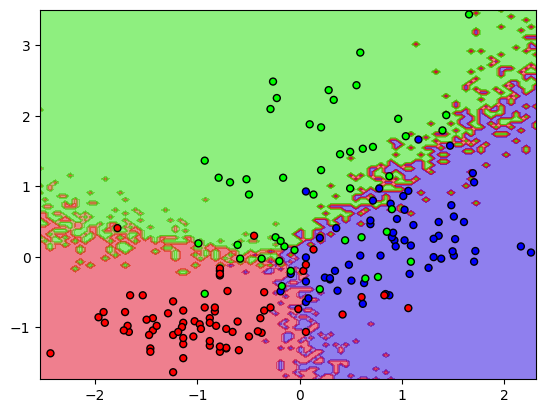

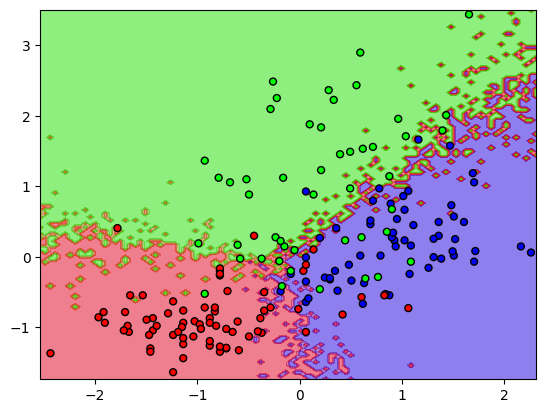

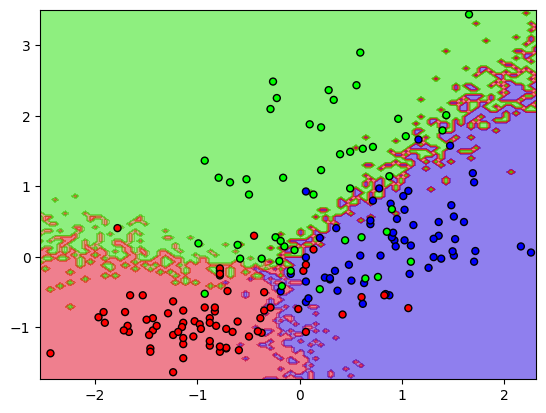

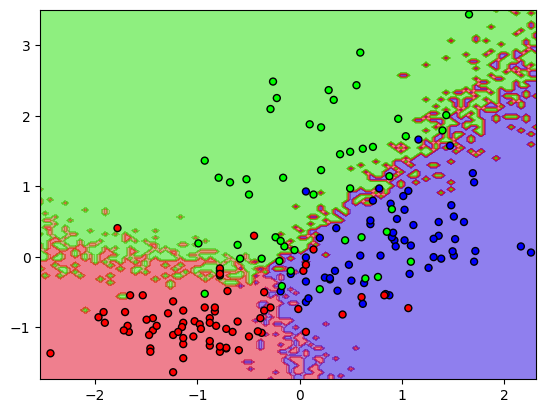

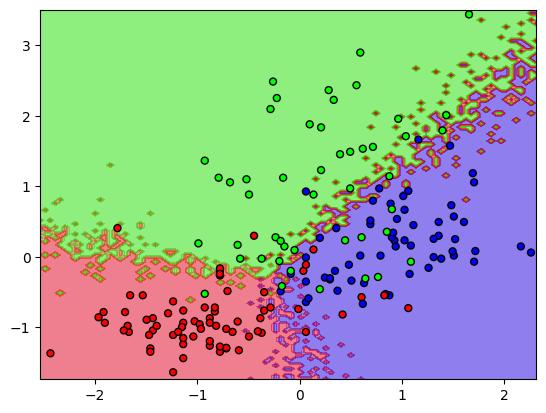

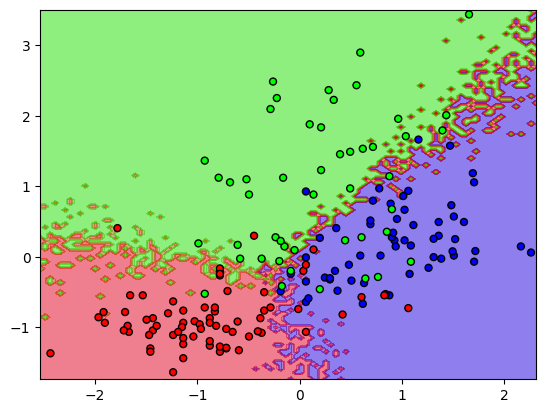

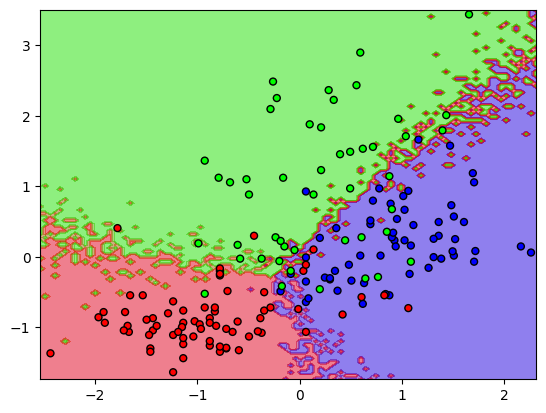

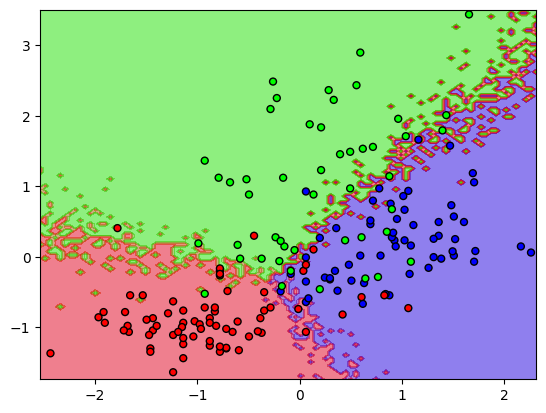

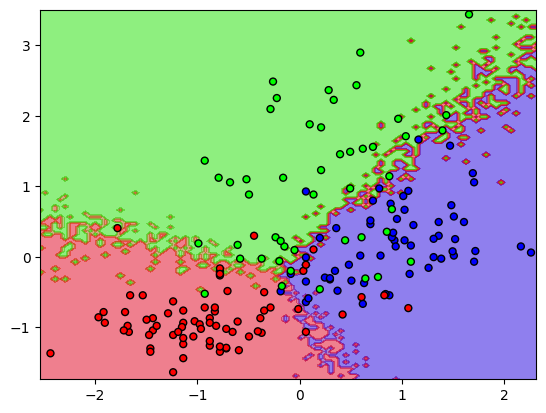

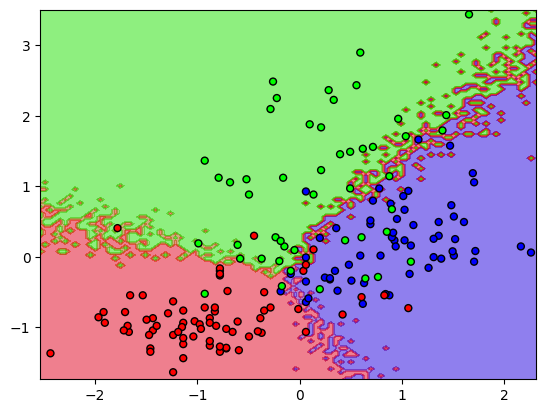

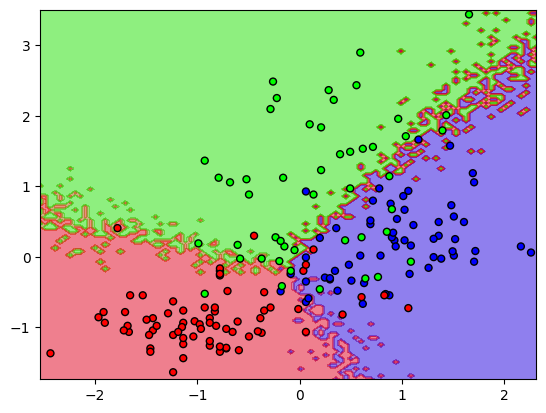

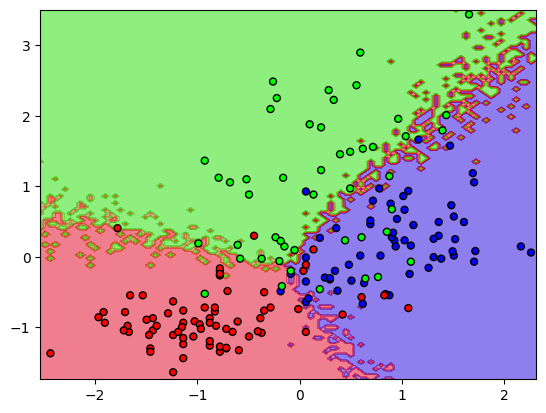

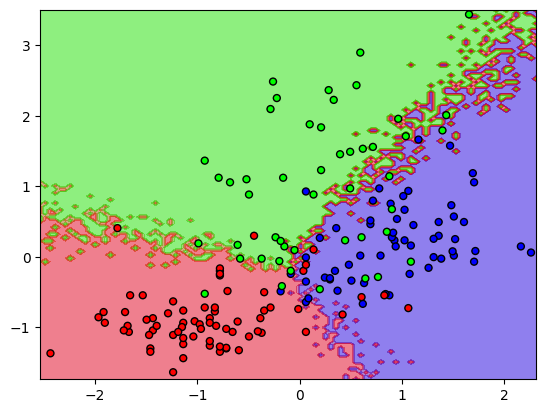

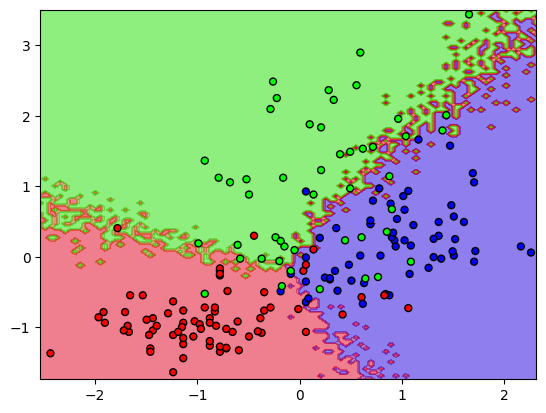

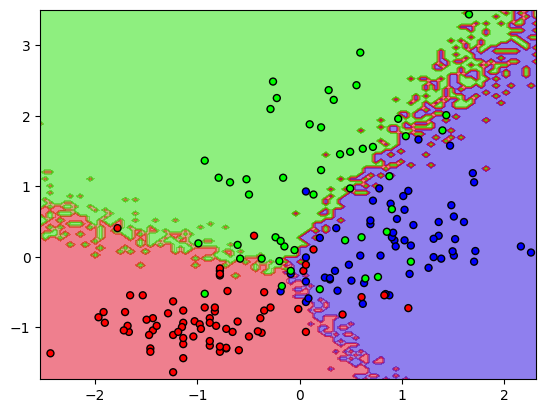

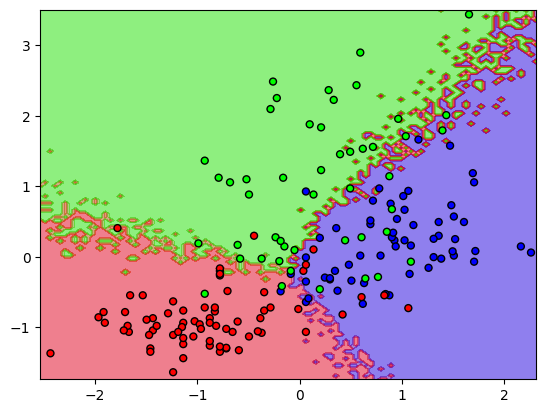

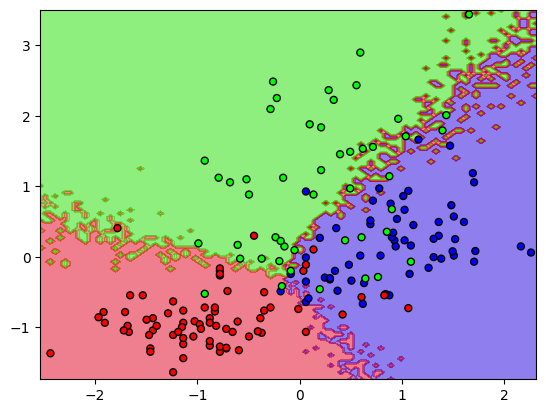

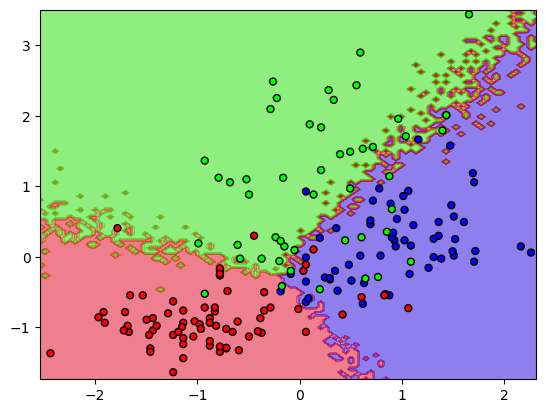

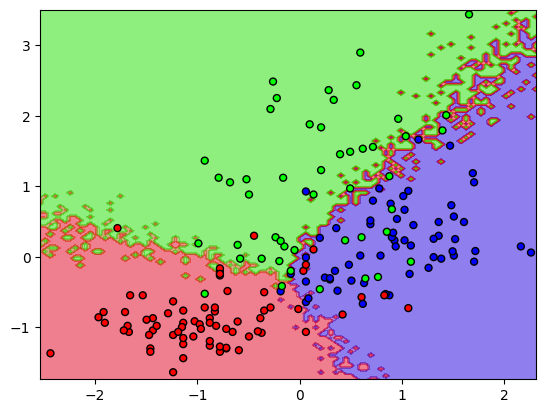

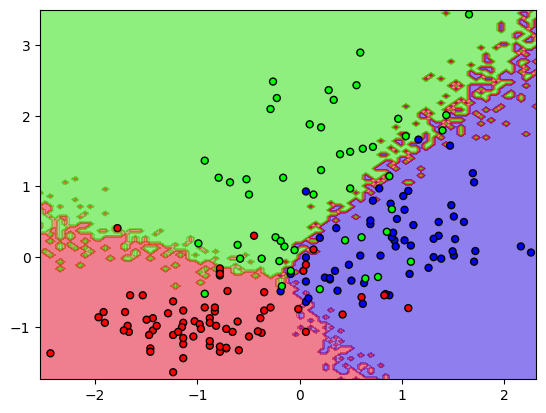

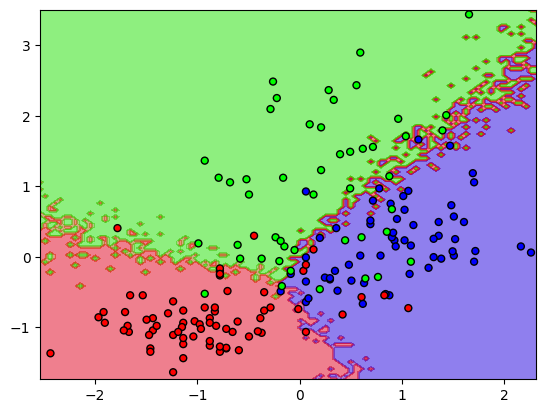

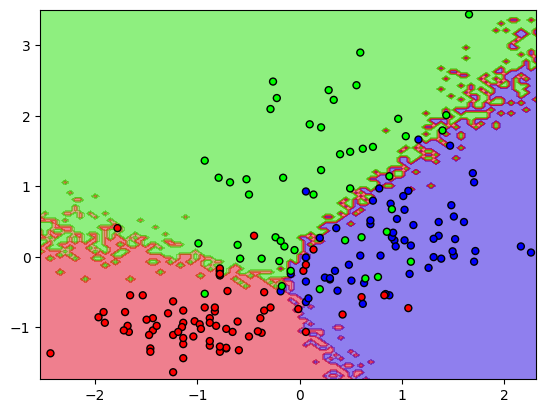

In [ ]:
for i in range(300):

    # Marking prediction
    pred = new_net_wine(X)
    loss = criterion(pred, y)

    # Backward

    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        plt.figure()
        plot_boundary(data, target, new_net_wine)

## Creating model with pytorch data

## Hiperparameters

In [ ]:
# Defining a dictionary with the model parameters
args = {
    'device': '',
    'batch_size': 128,
    'num_workers': 2,
    'lr': 1e-5,
    'weight_decay': 5e-4,
    'num_epochs': 50
}

In [ ]:
# Check which device is available
if torch.cuda.is_available():
    args['device'] = 'cuda'
else:
    args['device'] = 'cpu'

args['device']

'cpu'

## Loading Dataset Pytorch

In [ ]:
# Loading data training

train_set = datasets.MNIST(
    './',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

In [ ]:
test_set = datasets.MNIST(
    './',
    train = False,
    transform = transforms.ToTensor(),
    download = False
)

In [ ]:
# Train size
print(f'Train size: {len(train_set)}')

# Test size
print(f'Test size: {len(test_set)}')

Train size: 60000
Test size: 10000


## Analyzing datasets

In [ ]:
# Type data_train and data test
print(f'Data Train: {type(train_set)} \nData Test: {type(test_set)}')

Data Train: <class 'torchvision.datasets.mnist.MNIST'> 
Data Test: <class 'torchvision.datasets.mnist.MNIST'>


In [ ]:
# Type data_train idex 0
print(type(train_set[0]))

<class 'tuple'>


## Viewing train_data


In [ ]:
train_set[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

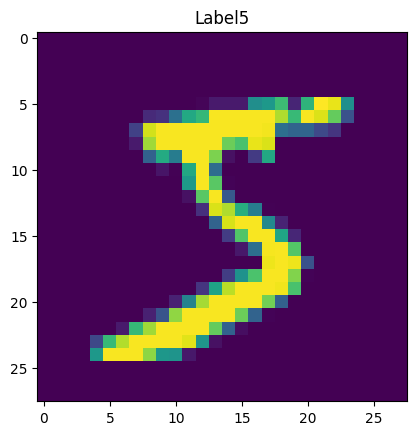

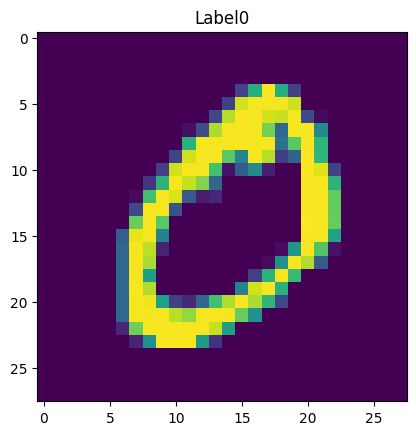

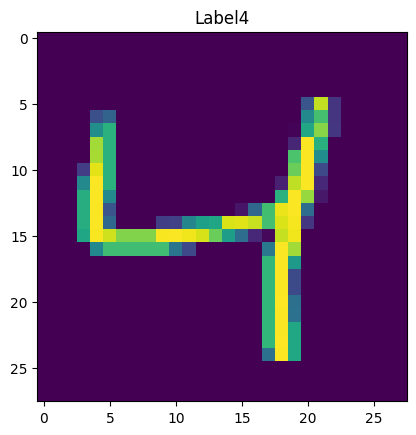

In [ ]:
for i in range(3):
    data, label = train_set[i]
    plt.figure()
    plt.imshow(data[0])
    plt.title(f'Label{label}')

## DataLoader

In [ ]:
# Initializing the train_loader
train_loader = DataLoader(
    dataset = train_set,
    batch_size = args['batch_size'],
    shuffle = True,
    num_workers = args['num_workers']
)

In [ ]:
# Initializing the test_loader
test_loader = DataLoader(
    dataset = test_set,
    batch_size = args['batch_size'],
    shuffle = True,
    num_workers = args['num_workers']
)

In [ ]:
# Checking the size of training and test data in DataLoader
print(f'Train_loader: {len(train_loader)} \nTest_loader: {len(test_loader)}')

Train_loader: 469 
Test_loader: 79


torch.Size([128, 1, 28, 28]) torch.Size([128])


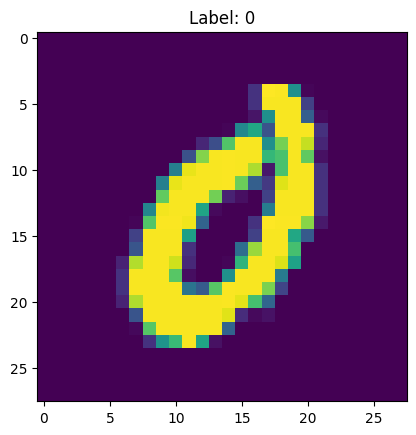

In [ ]:
for batch in train_loader:
    data, label = batch
    print(data.size(), label.size())

    plt.imshow(data[0][0])
    plt.title(f'Label: {label[0]}')
    break

## Creating a Neural Network

In [ ]:
# Assembling network model

class NetWorkVision(nn.Module):

    # Initializing function
    def __init__(self, input_size, out_size, dropout_prob = 0.5):
        super(NetWorkVision, self).__init__()

        # Defining neural network layers
        self.layers = nn.Sequential(

            # Input Layer + Hidden Layer_0
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout_prob),

            # Hidden Layer_1
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_prob),

            # Hidden Layer_2
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob)
        )
        # He initialization for the linear layers
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
        # Out Layer
        self.out = nn.Linear(128, out_size)

    # Defining Forward function
    def forward(self, X):

        X = X.view((X.size(0), -1))

        # Input layers
        layers = self.layers(X)

        # Output layers
        output = self.out(layers)

        # Returning the output data
        return output

In [ ]:
# Initializing network
net = NetWorkVision(
    input_size = 28 * 28,
    out_size = 10
)
net

NetWorkVision(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
  )
  (out): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
summary(net, input_size = (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
              ReLU-2                  [-1, 512]               0
           Dropout-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
              ReLU-5                  [-1, 256]               0
           Dropout-6                  [-1, 256]               0
            Linear-7                  [-1, 128]          32,896
              ReLU-8                  [-1, 128]               0
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.16
Estimated T

## Loss

In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device'])

## Optimizer

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = args['lr'], weight_decay = args['weight_decay'])

## Training flow

In [ ]:
# Function training
def training(train_loader, net, epoch):

    # Setting training mode to network
    net.train()

    # Epochs
    epochs_loss = []

    # Batchs
    for batch in train_loader:

        # Separating data and labels
        data, label = batch

        # Cast in Device(GPU/CPU)
        data = data.to(args['device'])
        label = label.to(args['device'])

        # Forward
        pred = net(data) # Prediction
        loss = criterion(pred, label) # Calculate errors
        epochs_loss.append(loss.cpu().data) # Saving training error data

        # Backward
        loss.backward()
        optimizer.step()

    # Epochs_loss in to Numpy
    epochs_loss = np.asarray(epochs_loss)

    # Viewing training progress
    print(10*'##', '-Training-', 10*'##')
    print(f'Epoch: {epoch} -- Loss: {epochs_loss.mean():.4f} ----- [+ -]         {epochs_loss.std():.4f}')

    return epochs_loss.mean()

In [ ]:
# Function test
def test(test_loader, net, epoch):

    # Setting test mode to network
    net.eval()
    with torch.no_grad():

        # Epochs
        epochs_loss = []

        # Batchs
        for batch in test_loader:

            # Separating data and labels
            data, label = batch

            # Cast in Device(GPU/CPU)
            data = data.to(args['device'])
            label = label.to(args['device'])

            # Forward
            pred = net(data) # Prediction
            loss = criterion(pred, label) # Calculate errors
            epochs_loss.append(loss.cpu().data) # Saving training error data

    # Epochs_loss in to Numpy
    epochs_loss = np.asarray(epochs_loss)

    # Viewing training progress
    print(10*'##', '-  Test  -', 10*'##')
    print(f'Epoch: {epoch} -- Loss: {epochs_loss.mean():.4f} ----- [+ -]         {epochs_loss.std():.4f}')

    return epochs_loss.mean()

## Training

In [ ]:
training_loss, test_loss = [], []

# Training + test(validation)
for epoch in range(args['num_epochs']):
    training_loss.append(training(train_loader, net, epoch))
    test_loss.append(test(test_loader, net, epoch))
    print('\n')

#################### -Training- ####################
Epoch: 0 -- Loss: 2.0770 ----- [+ -]         0.2289
#################### -  Test  - ####################
Epoch: 0 -- Loss: 1.3647 ----- [+ -]         0.0487


#################### -Training- ####################
Epoch: 1 -- Loss: 1.2180 ----- [+ -]         0.2241
#################### -  Test  - ####################
Epoch: 1 -- Loss: 0.5404 ----- [+ -]         0.0815


#################### -Training- ####################
Epoch: 2 -- Loss: 0.7652 ----- [+ -]         0.1277
#################### -  Test  - ####################
Epoch: 2 -- Loss: 0.4034 ----- [+ -]         0.0850


#################### -Training- ####################
Epoch: 3 -- Loss: 0.5644 ----- [+ -]         0.1027
#################### -  Test  - ####################
Epoch: 3 -- Loss: 0.3303 ----- [+ -]         0.0770


#################### -Training- ####################
Epoch: 4 -- Loss: 0.4595 ----- [+ -]         0.0968
#################### -  Test  - ###############

# Validation Dataset

# Viewing training and testing

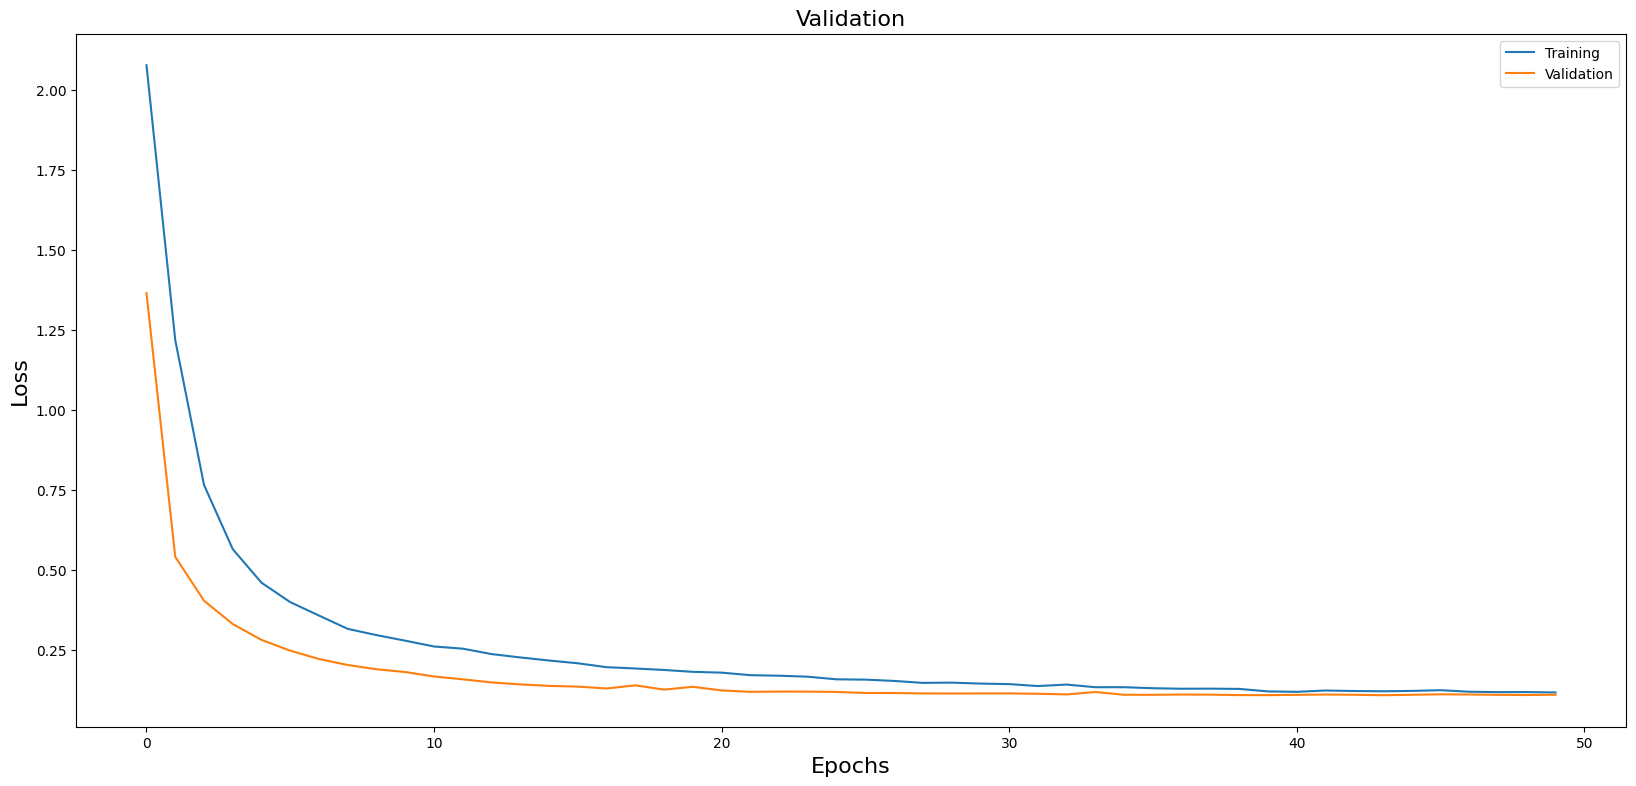

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(training_loss, label = 'Training')
plt.plot(test_loss, label = 'Validation')
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Validation', fontsize = 16)
plt.legend()
plt.show()